In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\12.Classification\\mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

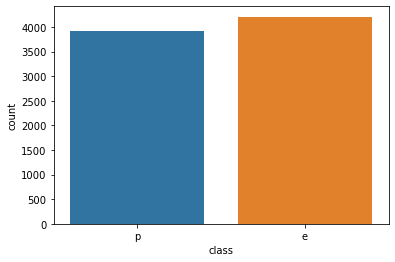

In [6]:
sns.countplot(data=df,x='class')

In [7]:
df.describe()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [8]:
df.describe().transpose()


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [9]:
X= df.drop('class',axis=1)

In [10]:
X=pd.get_dummies(X,drop_first=True)
y=pd.get_dummies(df['class'],drop_first=True)

# train test split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

# modelilng

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)

GradientBoostingClassifier()

# prediction


In [14]:
train_prediction = gb.predict(X_train)
test_prediction = gb.predict(X_test)


## evaluation

In [15]:
# accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

1.0
1.0


In [16]:
# cross validation score

from sklearn.model_selection import cross_val_score
score=cross_val_score(gb,X,y,cv=5)
print(score)

score.mean()

[0.84246154 1.         1.         1.         0.75369458]


0.9192312239484653

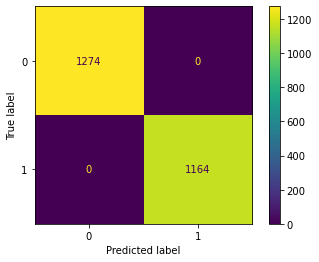

In [17]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gb,X_test,y_test)

In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,test_prediction)

array([[1274,    0],
       [   0, 1164]], dtype=int64)

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test,test_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# hyper parameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV 

In [21]:
estimator= GradientBoostingClassifier()

param_grid = {'n_estimators': list(range(1,100)),'learning_rate':[.1,.2,.3,.4,.5,.8,1]}

hp=GridSearchCV(estimator,param_grid,cv=5,scoring='accuracy')
hp.fit(X_train,y_train)
hp.best_params_

{'learning_rate': 0.1, 'n_estimators': 34}

# final model

In [22]:
gb= GradientBoostingClassifier(n_estimators=34,learning_rate=.1)
gb.fit(X_train,y_train)

test_prediction= gb.predict(X_test)
train_prediction = gb.predict(X_train)

print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

score= cross_val_score(gb,X,y,cv=5)
print(score)
score.mean()


0.9996482588814632
0.9991796554552912
[0.84246154 0.99938462 0.99569231 1.         0.65147783]


0.8978032588101554

In [23]:
a=gb.feature_importances_
a

array([1.69618290e-16, 9.91017985e-17, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.51627151e-03, 0.00000000e+00, 1.37434081e-16,
       0.00000000e+00, 0.00000000e+00, 2.71872028e-17, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.66393733e-17,
       4.17951515e-03, 4.72892373e-02, 0.00000000e+00, 1.42416028e-02,
       2.05030121e-02, 7.93425693e-05, 6.27634207e-01, 4.78306203e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.37068579e-02,
       8.73151990e-03, 0.00000000e+00, 5.53628222e-16, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.20143225e-16, 0.00000000e+00, 8.50996123e-18, 0.00000000e+00,
       7.10115015e-04, 1.11775706e-04, 1.43283873e-01, 0.00000000e+00,
       2.69698391e-02, 1.83061435e-03, 3.18376017e-03, 0.00000000e+00,
       0.00000000e+00, 2.07684843e-04, 3.31729127e-02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.68797827e-04, 0.00000000e+00,
      

In [24]:
imp_feature=pd.DataFrame(index=X.columns,data=a,columns=['feature importance'])
imp_feature

,feature importance
cap-shape_c,1.696183e-16
cap-shape_f,9.910180e-17
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,0.000000e+00
...,...
habitat_l,0.000000e+00
habitat_m,0.000000e+00
habitat_p,0.000000e+00
habitat_u,0.000000e+00


In [25]:
imp_feature=imp_feature[imp_feature['feature importance']>0.01]
b=imp_feature.sort_values('feature importance')
b.index

Index(['gill-spacing_w', 'odor_f', 'odor_l', 'stalk-root_r',
       'spore-print-color_r', 'stalk-surface-below-ring_y', 'bruises_t',
       'stalk-root_c', 'odor_n'],
      dtype='object')

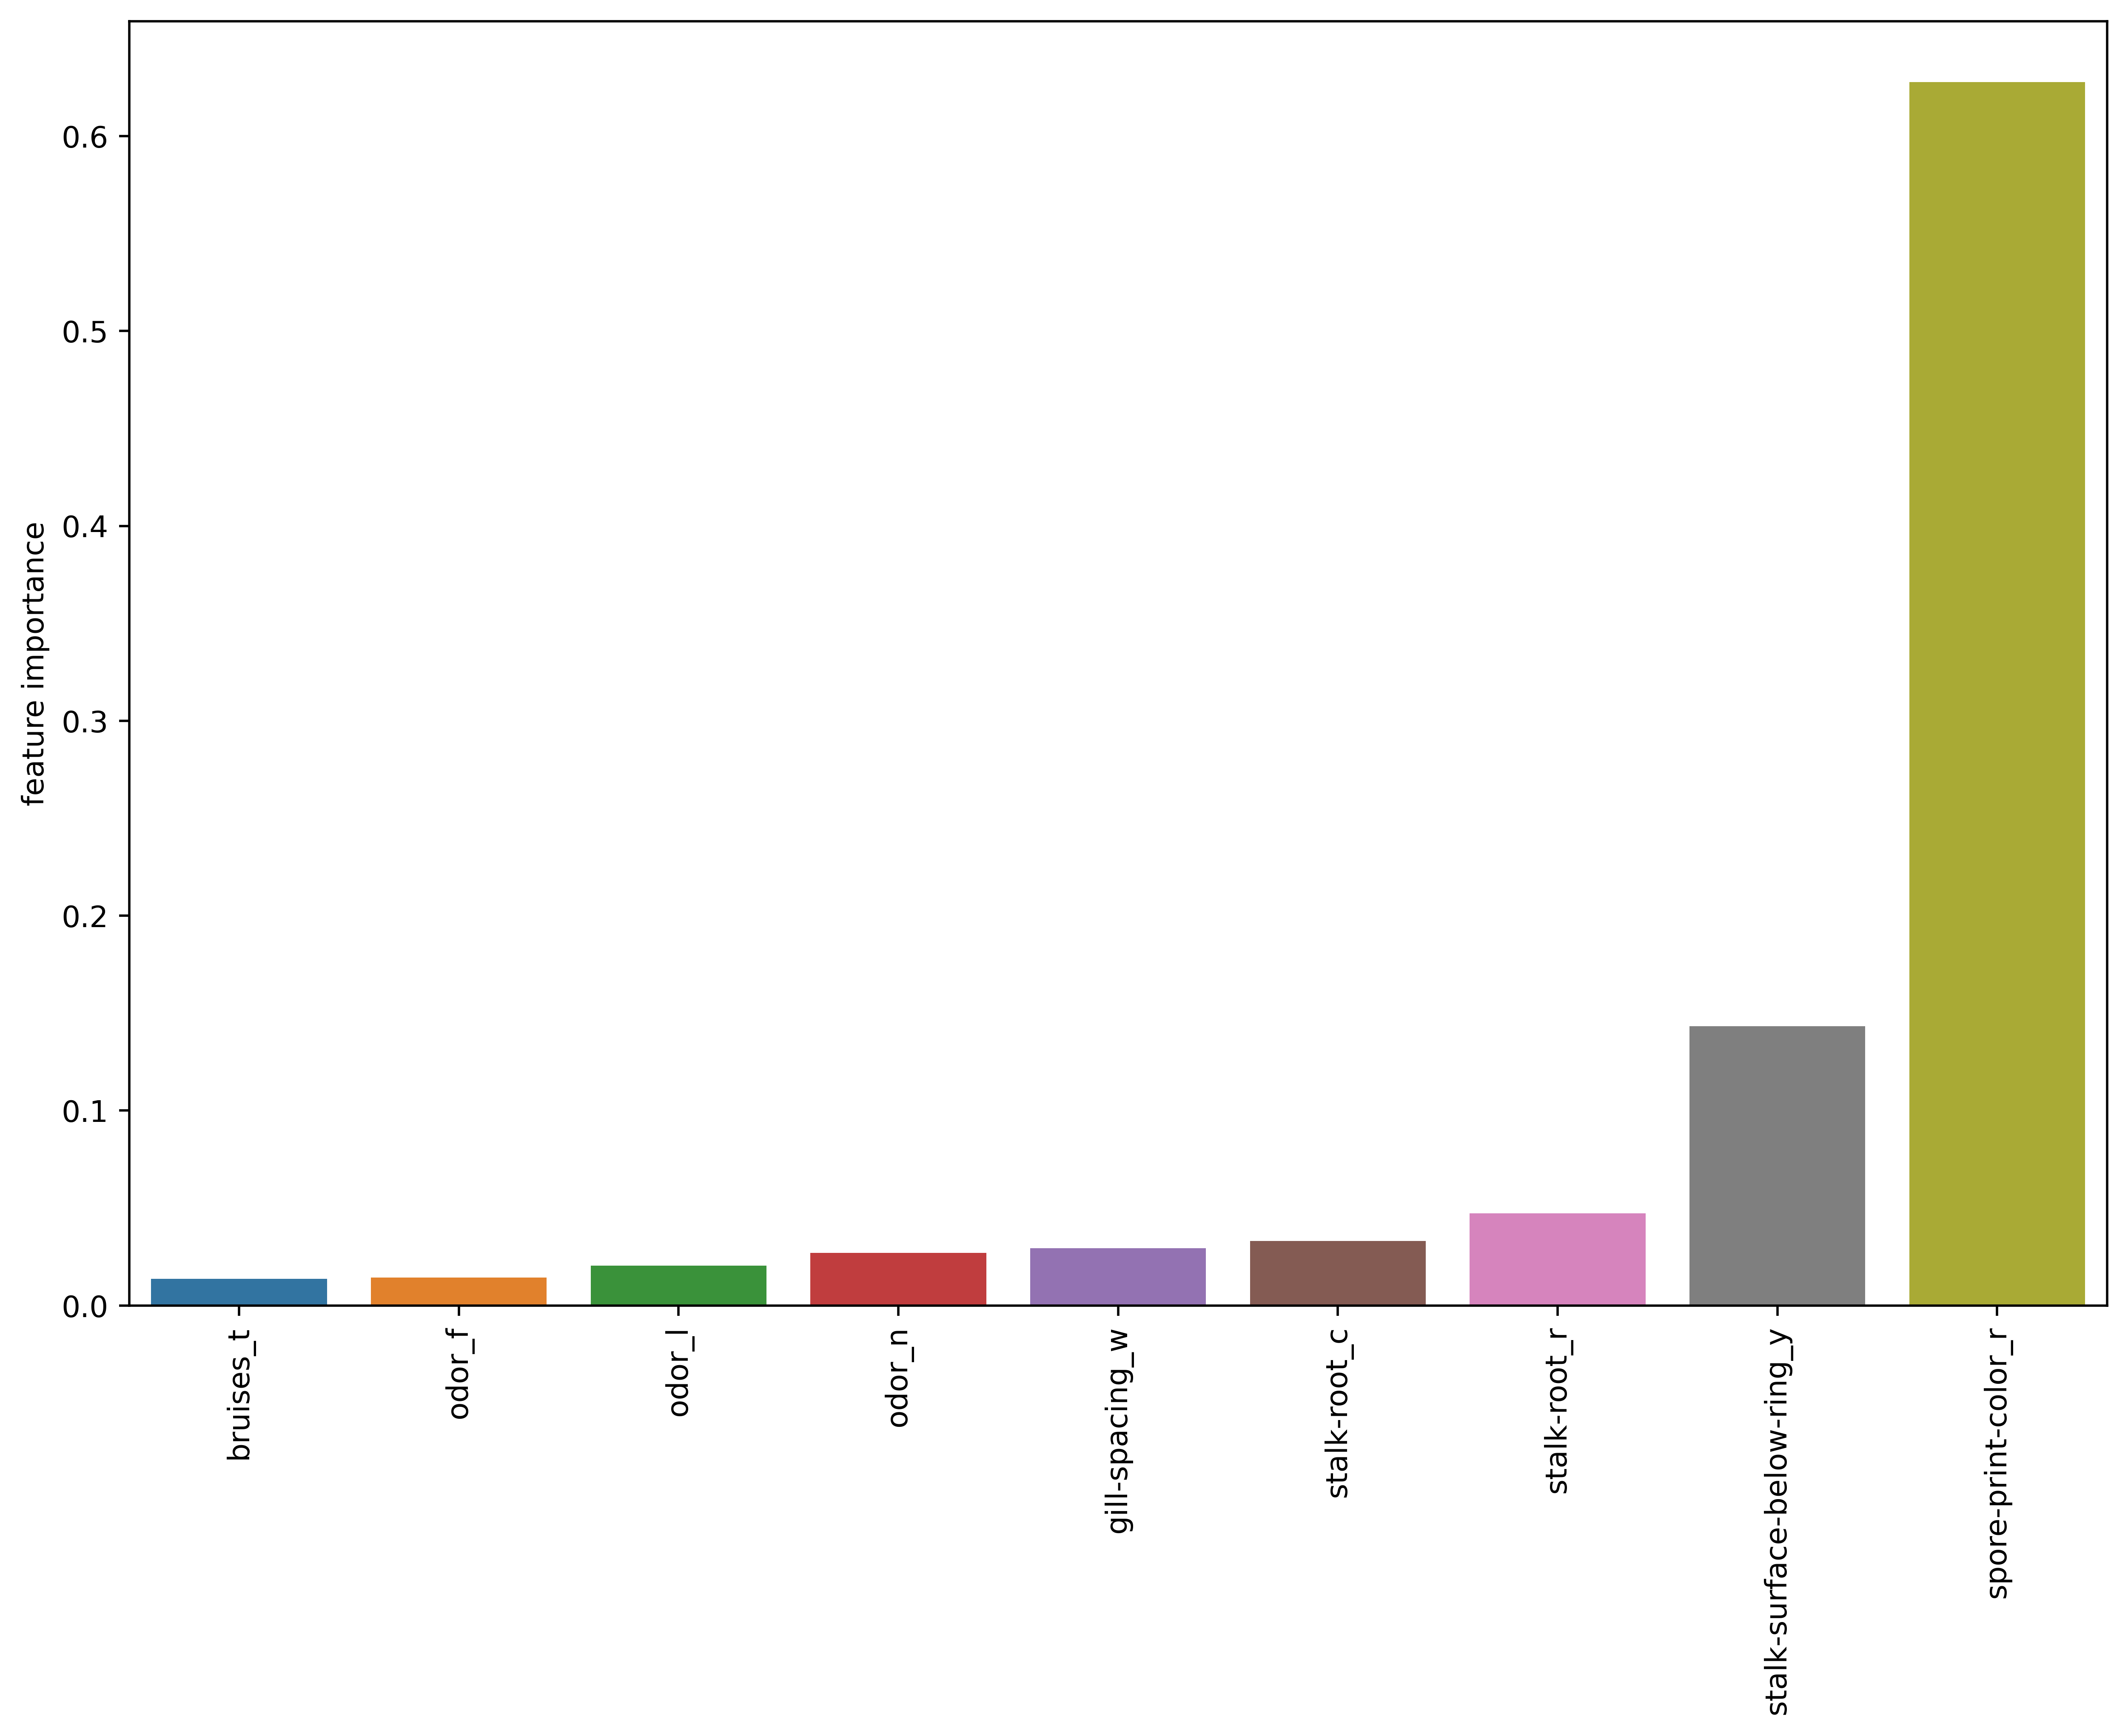

In [26]:
plt.figure(figsize=(12,8),dpi=(500))
sns.barplot(data=b,x=imp_feature.index,y='feature importance')
plt.xticks(rotation=90)
plt.show()

# Final rebuilt madel with imp features

In [27]:
X=X[['gill-spacing_w', 'odor_f', 'odor_l', 'spore-print-color_r',
     'stalk-surface-below-ring_y', 'stalk-root_r', 'bruises_t','stalk-root_c', 'odor_n']]

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=101,test_size=0.3)

********************
0.9978895532887795
0.9983593109105825
********************
[0.84246154 0.99938462 0.984      1.         0.99014778]
0.9631987874194771
********************
********************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



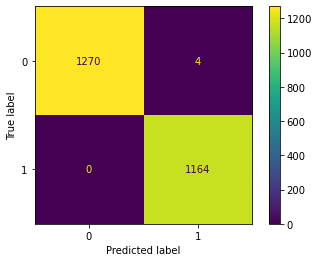

In [29]:
gb= GradientBoostingClassifier(n_estimators=34,learning_rate=.1)
gb.fit(X_train,y_train)

test_prediction= gb.predict(X_test)
train_prediction = gb.predict(X_train)
print('*'*20)
print(accuracy_score(y_train,train_prediction))
print(accuracy_score(y_test,test_prediction))

print('*'*20)

score= cross_val_score(gb,X,y,cv=5)
print(score)
print(score.mean())

print('*'*20)
from sklearn.metrics import plot_confusion_matrix,classification_report

plot_confusion_matrix(gb,X_test,y_test)

print('*'*20)
print(classification_report(y_test,test_prediction))